In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/new_dataset.nc')
df_eta = xr.open_dataset('C:/Users/eirik/Master/Data/Eta.nc')

In [3]:
OW = df['Okubo_Weiss']*(1/(10**(-9)))
eta = df_eta['Eta']

In [4]:
OW = OW.sel(time='2018-03-31T00:00:00.000000000')
OW = OW.sel(X=slice(-20,0))
OW = OW.sel(Y=slice(72,73))
OW = OW.sel(Z=-1)
eta = eta.sel(time='2018-03-31T00:00:00.000000000')
eta = eta.sel(X=slice(-20,0))
eta = eta.sel(Y=slice(72,73))

In [5]:
display(OW,eta)

<xarray.DataArray 'Okubo_Weiss' (Y: 47, X: 435)>
array([[ 5.61061491e-02,  3.39343508e-03, -1.14188350e-02, ...,
        -2.73371846e-01,  9.28715364e-01,  4.66645145e+00],
       [ 2.11830381e-02, -4.82414125e-02, -3.61105491e-02, ...,
         1.09902520e+00, -7.07030124e-01, -3.58941467e+00],
       [-1.21032703e-01, -1.54546179e-01, -4.76496286e-02, ...,
         7.59447273e-02, -1.45798822e+00, -5.52448886e+00],
       ...,
       [-6.90761742e-02, -7.98488420e-02, -3.88542459e-02, ...,
         5.77155153e-02,  2.05877460e-01,  2.15301968e-01],
       [-3.56263673e-02, -6.66998679e-02, -1.69690434e-02, ...,
         7.33538251e-02,  1.07870813e-01,  9.86616767e-02],
       [ 2.98470662e-02, -4.33857700e-02, -5.39179883e-02, ...,
         1.47019427e-01,  1.36719004e-01,  1.86554233e-01]])
Coordinates:
    Z        float64 -1.0
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31

<xarray.DataArray 'Eta' (Y: 47, X: 435)>
[20445 values with dtype=float64]
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

In [6]:
from detection import eddyDetection

In [7]:
Eddy_locations = eddyDetection(eta,OW)

Generating Frames: 100%|██████████| 39/39 [00:28<00:00,  1.38it/s]

Skiped windows %: 85.02972437398667


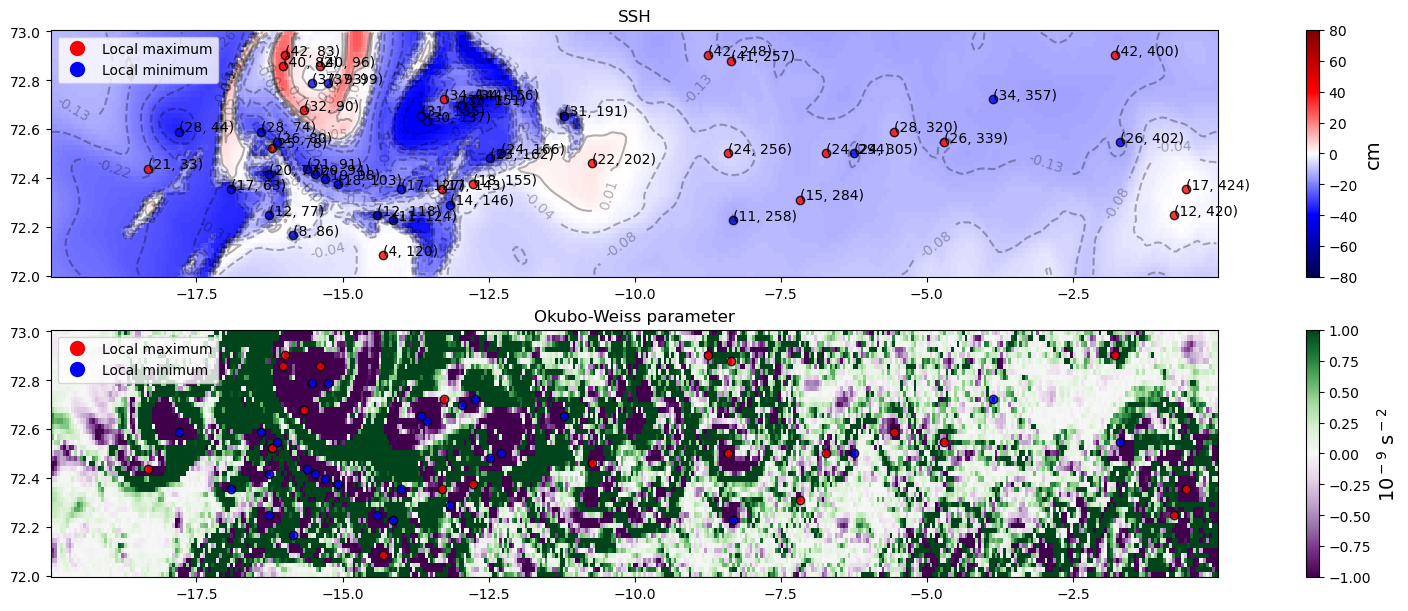

In [9]:
import matplotlib.lines as mlines

# cmap = 'seismic'
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=[14,6],layout='constrained')

# mesh = ax1.pcolormesh(eta.X,eta.Y,eta*100,cmap=cmap,vmin=-80,vmax=80)
# cbar = fig.colorbar(mesh)
# cbar.set_label('cm',fontsize=14)
# cntr = ax1.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,12),colors='black',alpha=0.3)
# ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

# ax1.set_title('SSH')

# for i in Eddy_locations[0]:
#     sct1 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)
#     ax1.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])

# for i in Eddy_locations[1]:
#     sct2 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)
#     ax1.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])


# # Create custom legend handles using Line2D
# red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
# blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

# # Add the legend to the plot
# ax1.legend(handles=[red_circle, blue_circle])

# cmap = 'PRGn'

# mesh = ax2.pcolormesh(OW.X,OW.Y,OW,cmap=cmap,vmin=-1,vmax=1)
# cbar = fig.colorbar(mesh)
# cbar.set_label('10$^-$$^9$ s$^-$$^2$',fontsize=14)

# ax2.set_title('Okubo-Weiss parameter')

# for i in Eddy_locations[0]:
#     sct1 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)
    

# for i in Eddy_locations[1]:
#     sct2 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)


# # Create custom legend handles using Line2D
# red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
# blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

# # Add the legend to the plot
# ax2.legend(handles=[red_circle, blue_circle])

In [10]:
from detection import inner_eddy_region

In [11]:
test_eddy = Eddy_locations[0][7]
display(len(eta.X),len(eta.Y))
display(test_eddy)
test = inner_eddy_region(eta,test_eddy,warm=True)
display(test)

435

47

(22, 202)

<xarray.DataArray 'EddyDetection' (Y: 47, X: 435)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

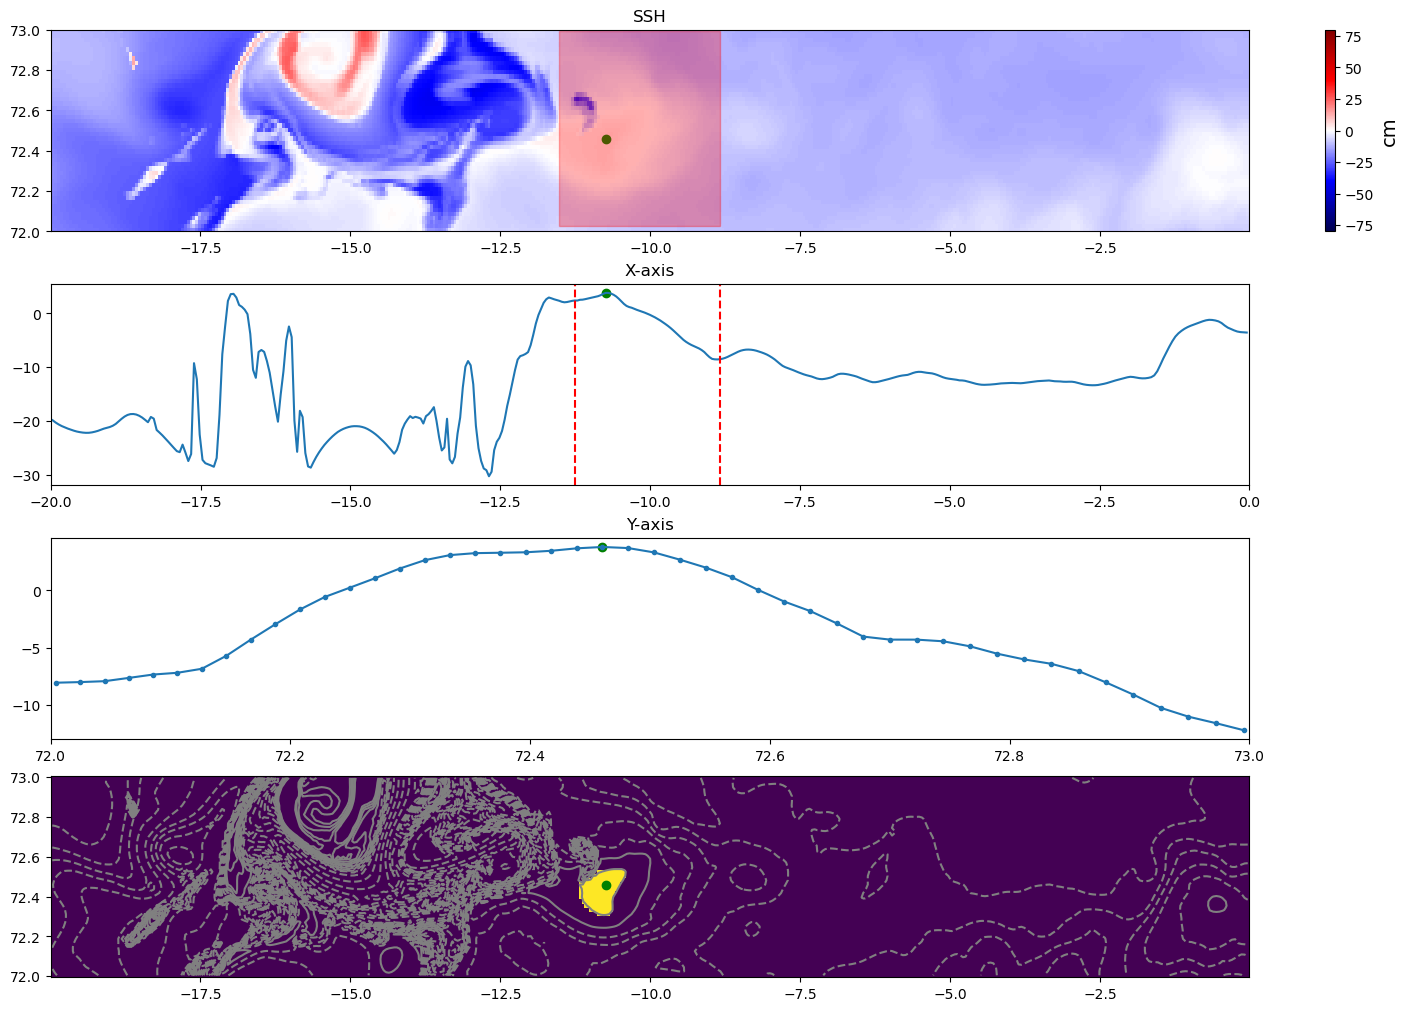

In [12]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=[14,10],layout='constrained')

cmap = 'seismic'
mesh = ax1.pcolormesh(eta.X,eta.Y,eta*100,cmap=cmap,vmin=-80,vmax=80)
cbar = fig.colorbar(mesh)
cbar.set_label('cm',fontsize=14)
# cntr = ax1.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,21),colors='black',alpha=0.3)
# ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

ax1.scatter(eta.X[202].values,eta.Y[22],color='green')
ax1.set_title('SSH')
ax1.set_ylim(72,73)
ax1.fill([eta.X[184],eta.X[246],eta.X[246],eta.X[184]],[eta.Y[1],eta.Y[1],eta.Y[46],eta.Y[46]],color='red',alpha=0.3)

# SSH X dir around center
SSH = eta.sel(Y=eta.Y[22].values)
ax2.plot(SSH.X,SSH*100)
ax2.set_xlim(-20,0)
ax2.scatter(eta.X[202],SSH[202]*100,color='green')
ax2.axvline(x=eta.X[190],color='r',linestyle='--')
ax2.axvline(x=eta.X[246],color='red',linestyle='--')
ax2.set_title('X-axis')

SSH = eta.sel(X=eta.X[202].values)
ax3.plot(SSH.Y,SSH*100,'.-')
ax3.scatter(eta.Y[22],SSH[22]*100,color='green')
ax3.set_xlim(72,73)
ax3.set_title('Y-axis')

ax4.pcolormesh(test.X,test.Y,test)
cntr = ax4.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,21),colors='grey')
# ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax4.scatter(eta.X[202].values,eta.Y[22],color='green')


# Starting identifying inner eddy region
Running for one timestep

In [13]:
from tqdm import tqdm

In [14]:
eddy_centers = Eddy_locations

# First run
T = len(eddy_centers[0])+len(eddy_centers[1])
pbar = tqdm(total=T, desc="Generating Frames")
eddyDataset = inner_eddy_region(eta=eta,eddy_center=eddy_centers[0][0],warm=True)
pbar.update(1)
for i in range(1,len(eddy_centers[0])):
    eddyDataset = inner_eddy_region(eta=eta,eddy_center=eddy_centers[0][i],warm=True,eddiesDataset=eddyDataset,use_eddyDataset=True)
    pbar.update(1)
print('#####Moving to cold eddies#####')
for i in range(0,len(eddy_centers[1])):
    eddyDataset = inner_eddy_region(eta=eta,eddy_center=eddy_centers[1][i],cold=True,eddiesDataset=eddyDataset,use_eddyDataset=True)
    pbar.update(1)

Generating Frames:  29%|██▊       | 14/49 [00:04<00:08,  4.00it/s]

Error in XY domain: No change in eta detected. To low extent etc


Generating Frames:  47%|████▋     | 23/49 [00:05<00:02,  9.08it/s]

Error in XY domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc
#####Moving to cold eddies#####


Generating Frames:  88%|████████▊ | 43/49 [00:09<00:01,  4.26it/s]

Error in eddy:  (26, 402)  Skiped
Error in XY domain: No change in eta detected. To low extent etc
Error in eddy:  (28, 44)  Skiped


Generating Frames: 100%|██████████| 49/49 [00:10<00:00,  4.87it/s]

<xarray.DataArray 'EddyDetection' (Y: 47, X: 435)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

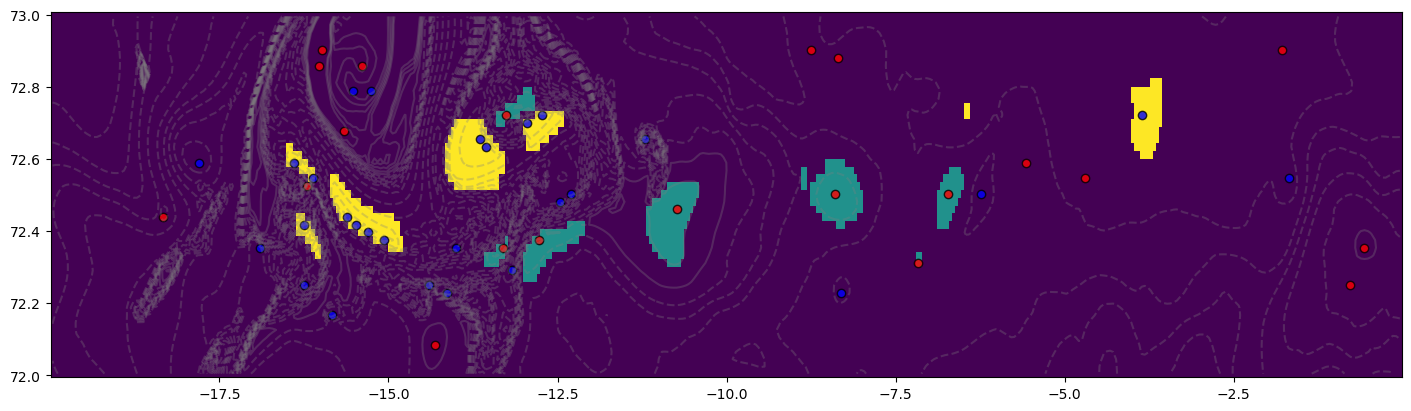

In [18]:
display(eddyDataset)
fig, ax = plt.subplots(figsize=(14,4),layout='constrained')
ax.pcolormesh(eddyDataset.X,eddyDataset.Y,eddyDataset)
cntr = ax.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,21),colors='grey',alpha=0.3)
for i in Eddy_locations[0]:
    sct1 = ax.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)
    # ax.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])

for i in Eddy_locations[1]:
    sct2 = ax.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)
    # ax.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])